<h1 style="
    padding: 35px;
    color: white;
    margin: 10px;
    font-size: 200%;
    text-align: center;
    display: fill;
    border-radius: 10px;
    overflow: hidden;
    background: linear-gradient(135deg, #1e88e5 0%, #00acc1 50%, #00897b 100%);
">
    <b>Classification Spam or Ham 📧🔍🤖</b>
</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline   
from sklearn.ensemble import VotingClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
import wordcloud

In [2]:
data = pd.read_csv("D:/Projects/spam_or_hum/archive/spam.csv", encoding='cp1252')
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace=True)
data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


C:\Users\Asus\AppData\Local\Temp\ipykernel_16020\1513037214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=data['Target'], palette=cols)


Text(0, 0.5, 'Number of Data points')

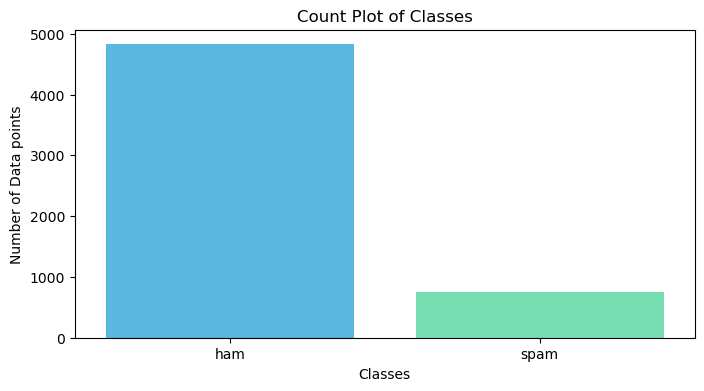

In [3]:
cols= ["#43C0F6", "#67EEB4"] 
plt.figure(figsize=(8, 4))
fg = sns.countplot(x=data['Target'], palette=cols)
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

<div style="
    background: linear-gradient(135deg, #1e88e5, #00acc1, #00897b);
    padding: 15px;
    border-radius: 10px;
    text-align: center;
    color: white;
    font-size: 24px;
    font-weight: bold;
    margin: 20px 0;
    border: 2px solid #26a69a;
">
🔍 Features 
</div>

In [4]:
data['length'] = data['Text'].apply(len)
data['words_count'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1).apply(len)
data['sent_count'] = data.apply(lambda row: nltk.sent_tokenize(row['Text']), axis=1).apply(len)
data.describe()

,length,words_count,sent_count
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


<div style="
    background: linear-gradient(135deg, #1e88e5, #00acc1, #00897b);
    padding: 15px;
    border-radius: 10px;
    text-align: center;
    color: white;
    font-size: 24px;
    font-weight: bold;
    margin: 20px 0;
    border: 2px solid #26a69a;
">
📊 EDA - Exploratory Data Analysis
</div>

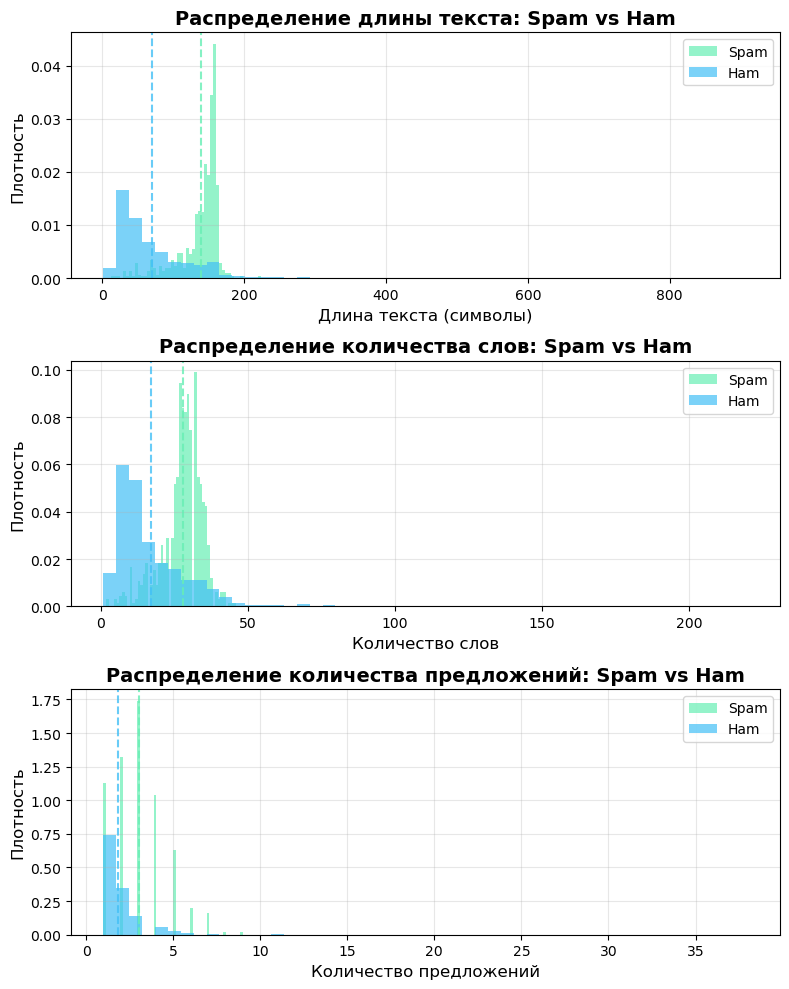

СТАТИСТИКА ДЛИНЫ ТЕКСТА:
Spam - Среднее: 138.9, Медиана: 149.0
Ham - Среднее: 71.0, Медиана: 52.0

СТАТИСТИКА КОЛИЧЕСТВА СЛОВ:
Spam - Среднее: 27.9, Медиана: 29.0
Ham - Среднее: 17.3, Медиана: 13.0

СТАТИСТИКА КОЛИЧЕСТВА ПРЕДЛОЖЕНИЙ:
Spam - Среднее: 3.0, Медиана: 3.0
Ham - Среднее: 1.8, Медиана: 1.0


In [5]:
spam_data = data[data['Target'] == 'spam']
ham_data = data[data['Target'] == 'ham']

fig, axes = plt.subplots(3, 1, figsize=(8, 10))

color_spam = "#67EEB4"
color_ham = "#43C0F6"

axes[0].hist(spam_data['length'], 
             bins=50, 
             alpha=0.7, 
             color=color_spam, 
             label='Spam', 
             density=True)  
axes[0].hist(ham_data['length'], 
             bins=50, 
             alpha=0.7, 
             color=color_ham, 
             label='Ham', 
             density=True)  

axes[0].set_xlabel('Длина текста (символы)', fontsize=12)
axes[0].set_ylabel('Плотность', fontsize=12)
axes[0].set_title('Распределение длины текста: Spam vs Ham', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].legend()

mean_spam_len = spam_data['length'].mean()
mean_ham_len = ham_data['length'].mean()
axes[0].axvline(mean_spam_len, color=color_spam, linestyle='--', alpha=0.8)
axes[0].axvline(mean_ham_len, color=color_ham, linestyle='--', alpha=0.8)

axes[1].hist(spam_data['words_count'], 
             bins=50, 
             alpha=0.7, 
             color=color_spam, 
             label='Spam', 
             density=True)  
axes[1].hist(ham_data['words_count'], 
             bins=50, 
             alpha=0.7, 
             color=color_ham, 
             label='Ham', 
             density=True)  

axes[1].set_xlabel('Количество слов', fontsize=12)
axes[1].set_ylabel('Плотность', fontsize=12)
axes[1].set_title('Распределение количества слов: Spam vs Ham', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].legend()

mean_spam_words = spam_data['words_count'].mean()
mean_ham_words = ham_data['words_count'].mean()
axes[1].axvline(mean_spam_words, color=color_spam, linestyle='--', alpha=0.8)
axes[1].axvline(mean_ham_words, color=color_ham, linestyle='--', alpha=0.8)

axes[2].hist(spam_data['sent_count'], 
             bins=50, 
             alpha=0.7, 
             color=color_spam, 
             label='Spam', 
             density=True)  
axes[2].hist(ham_data['sent_count'], 
             bins=50, 
             alpha=0.7, 
             color=color_ham, 
             label='Ham', 
             density=True)  

axes[2].set_xlabel('Количество предложений', fontsize=12)
axes[2].set_ylabel('Плотность', fontsize=12)
axes[2].set_title('Распределение количества предложений: Spam vs Ham', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3)
axes[2].legend()

mean_spam_sent = spam_data['sent_count'].mean()
mean_ham_sent = ham_data['sent_count'].mean()
axes[2].axvline(mean_spam_sent, color=color_spam, linestyle='--', alpha=0.8)
axes[2].axvline(mean_ham_sent, color=color_ham, linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()

print("СТАТИСТИКА ДЛИНЫ ТЕКСТА:")
print(f"Spam - Среднее: {mean_spam_len:.1f}, Медиана: {spam_data['length'].median():.1f}")
print(f"Ham - Среднее: {mean_ham_len:.1f}, Медиана: {ham_data['length'].median():.1f}")
print()
print("СТАТИСТИКА КОЛИЧЕСТВА СЛОВ:")
print(f"Spam - Среднее: {mean_spam_words:.1f}, Медиана: {spam_data['words_count'].median():.1f}")
print(f"Ham - Среднее: {mean_ham_words:.1f}, Медиана: {ham_data['words_count'].median():.1f}")
print()
print("СТАТИСТИКА КОЛИЧЕСТВА ПРЕДЛОЖЕНИЙ:")
print(f"Spam - Среднее: {mean_spam_sent:.1f}, Медиана: {spam_data['sent_count'].median():.1f}")
print(f"Ham - Среднее: {mean_ham_sent:.1f}, Медиана: {ham_data['sent_count'].median():.1f}")

In [6]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='winter', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

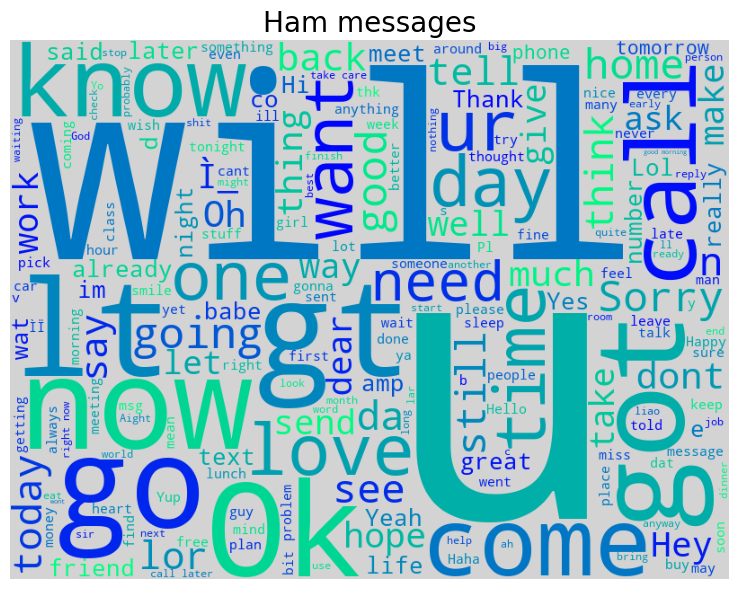

In [7]:
show_wordcloud(ham_data, "Ham messages")

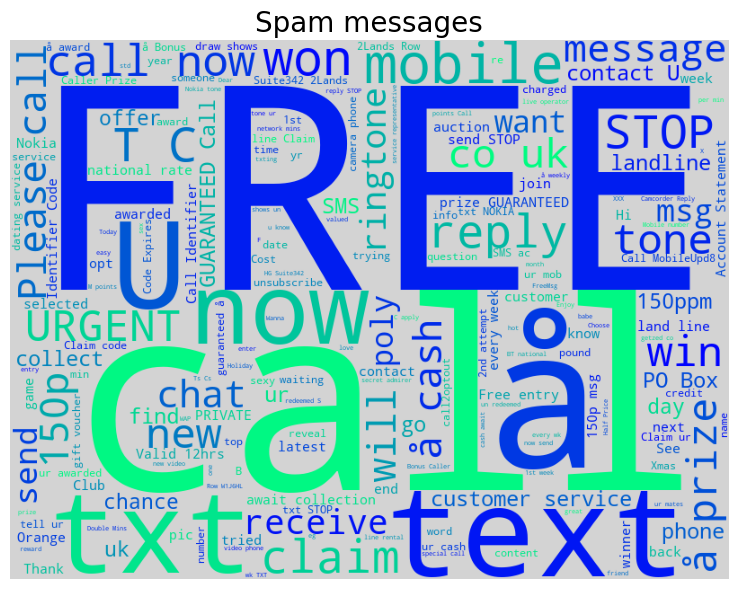

In [8]:
show_wordcloud(spam_data, "Spam messages")

<div style="
    background: linear-gradient(135deg, #1e88e5, #00acc1, #00897b);
    padding: 15px;
    border-radius: 10px;
    text-align: center;
    color: white;
    font-size: 24px;
    font-weight: bold;
    margin: 20px 0;
    border: 2px solid #26a69a;
">
🧹 Preprocessing
</div>

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'https&://\S+|www.\.\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'[^\w\s%°±×÷₽€$£\.\,\-\+\/\@\#\&\(\)\:\;]', '', text)
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

data['Text'] = data['Text'].apply(clean_text)

In [10]:
data

,Target,Text,length,words_count,sent_count
0,ham,"go until jurong point, crazy.. available only ...",111,24,2
1,ham,ok lar... joking wif u oni...,29,8,2
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,ham,u dun say so early hor... u c already then say...,49,13,1
4,ham,"nah i dont think he goes to usf, he lives arou...",61,15,1
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,will ì_ b going to esplanade fr home,37,9,1
5569,ham,"pity, was in mood for that. so...any other sug...",57,15,2
5570,ham,the guy did some bitching but i acted like id ...,125,27,1


In [11]:
lemmatizer = WordNetLemmatizer()
def lemm_text(text):
    tokens = word_tokenize(text) 
    lemm = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    return lemm

data['Text'] = data['Text'].apply(lemm_text)

In [12]:
data

,Target,Text,length,words_count,sent_count
0,ham,"[go, until, jurong, point, ,, crazy, .., avail...",111,24,2
1,ham,"[ok, lar, ..., joke, wif, u, oni, ...]",29,8,2
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...",155,37,2
3,ham,"[u, dun, say, so, early, hor, ..., u, c, alrea...",49,13,1
4,ham,"[nah, i, dont, think, he, go, to, usf, ,, he, ...",61,15,1
...,...,...,...,...,...
5567,spam,"[this, be, the, 2nd, time, we, have, try, 2, c...",161,35,4
5568,ham,"[will, ì_, b, go, to, esplanade, fr, home]",37,9,1
5569,ham,"[pity, ,, be, in, mood, for, that, ., so, ...,...",57,15,2
5570,ham,"[the, guy, do, some, bitch, but, i, act, like,...",125,27,1


In [13]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text
data['Text'] = data['Text'].apply(remove_stopwords)

In [14]:
data

,Target,Text,length,words_count,sent_count
0,ham,"[go, jurong, point, ,, crazy, .., available, b...",111,24,2
1,ham,"[ok, lar, ..., joke, wif, u, oni, ...]",29,8,2
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",155,37,2
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ...",49,13,1
4,ham,"[nah, dont, think, go, usf, ,, live, around, t...",61,15,1
...,...,...,...,...,...
5567,spam,"[2nd, time, try, 2, contact, u., u, win, å£750...",161,35,4
5568,ham,"[ì_, b, go, esplanade, fr, home]",37,9,1
5569,ham,"[pity, ,, mood, ., ..., suggestions]",57,15,2
5570,ham,"[guy, bitch, act, like, id, interest, buy, som...",125,27,1


In [15]:
corpus = []
for i in data['Text']:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

In [16]:
data

,Target,Text,length,words_count,sent_count
0,ham,"[go, jurong, point, ,, crazy, .., available, b...",111,24,2
1,ham,"[ok, lar, ..., joke, wif, u, oni, ...]",29,8,2
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",155,37,2
3,ham,"[u, dun, say, early, hor, ..., u, c, already, ...",49,13,1
4,ham,"[nah, dont, think, go, usf, ,, live, around, t...",61,15,1
...,...,...,...,...,...
5567,spam,"[2nd, time, try, 2, contact, u., u, win, å£750...",161,35,4
5568,ham,"[ì_, b, go, esplanade, fr, home]",37,9,1
5569,ham,"[pity, ,, mood, ., ..., suggestions]",57,15,2
5570,ham,"[guy, bitch, act, like, id, interest, buy, som...",125,27,1


In [17]:
def preprocess_data(data):
    le = LabelEncoder()
    data['Target'] = le.fit_transform(data['Target'])

    texts = data['Text'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
    vectorizer = TfidfVectorizer()
    X_tfidf = vectorizer.fit_transform(texts)

    data = data.copy()
    data['Text'] = list(X_tfidf.toarray())

    return data, vectorizer, le
data, tfidf_vectorizer, label_encoder = preprocess_data(data)

In [18]:
data

,Target,Text,length,words_count,sent_count
0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",111,24,2
1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",29,8,2
2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",155,37,2
3,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",49,13,1
4,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",61,15,1
...,...,...,...,...,...
5567,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",161,35,4
5568,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",37,9,1
5569,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",57,15,2
5570,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",125,27,1


In [19]:
y = data['Target']
X_text = np.vstack(data['Text'].values)
X_num = data[['length', 'words_count', 'sent_count']].values
X = np.hstack([X_num, X_text])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<div style="
    background: linear-gradient(135deg, #1e88e5, #00acc1, #00897b);
    padding: 15px;
    border-radius: 10px;
    text-align: center;
    color: white;
    font-size: 24px;
    font-weight: bold;
    margin: 20px 0;
    border: 2px solid #26a69a;
">
Model
</div>

In [20]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
cv_score = cross_val_score(classifier, X_train, y_train, scoring="precision", cv=5)
print("NBClassifier: %f" % cv_score.mean())

c:\Users\Asus\anaconda3\envs\mykerenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\envs\mykerenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


NBClassifier: 0.400000


c:\Users\Asus\anaconda3\envs\mykerenv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

Confusion Matrix:
 [[966   0]
 [136  13]]

Classification Report:
               precision    recall  f1-score   support

    Not Spam       0.88      1.00      0.93       966
        Spam       1.00      0.09      0.16       149

    accuracy                           0.88      1115
   macro avg       0.94      0.54      0.55      1115
weighted avg       0.89      0.88      0.83      1115

